In [1]:
from ROOT import TFile, TTree, TH1F, TCanvas
#from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
from utils import rootnotes
from utils import rootprint

Welcome to ROOTaaS 6.06/02


In [2]:
%%rootprint

inputFile = TFile("../out.root")
tree = inputFile.Get("event")
tree.Print()

******************************************************************************
*Tree    :event     : Tree with event info                                   *
*Entries :    20000 : Total =         4035447 bytes  File  Size =    2120324 *
*        :          : Tree compression factor =   1.90                       *
******************************************************************************
*Br    0 :MET       : MET/D                                                  *
*Entries :    20000 : Total  Size=     160900 bytes  File Size  =      91510 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.75     *
*............................................................................*
*Br    1 :HT        : HT/D                                                   *
*Entries :    20000 : Total  Size=     160890 bytes  File Size  =     100406 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.60     *
*...................................................

In [3]:
hMET = TH1F("MET", "MET", 25, 0. ,5000.)
hHT  = TH1F("HT", "H_{T}", 30, 2000. ,14000.)
hJet_Pt = []
for i in range(4):
    hJet_Pt.append(TH1F("Jet"+str(i+1)+"_Pt", "p_{T} of j_{"+str(i+1)+"}", 50, 0., 5000.-1000.*i))
hJet_MET_DeltaR = []
for i in range(4):
    hJet_MET_DeltaR.append(TH1F("Jet"+str(i+1)+"_MET_DeltaR", "#Delta R ( j_{"+str(i+1)+"}, MET )", 30, 0., 6))

for event in tree:
    hMET.Fill(event.MET)
    hHT.Fill(event.HT)
    for i in range(min(4,event.Jet_Pt.size())):
        hJet_Pt[i].Fill(event.Jet_Pt[i])
        hJet_MET_DeltaR[i].Fill(event.Jet_MET_DeltaR[i])

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


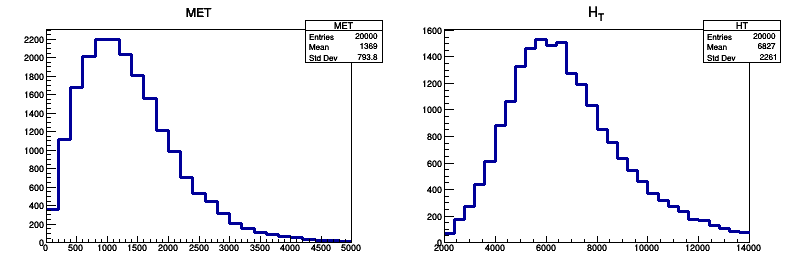

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpNv9vAN.png has been created


In [9]:
c1 = rootnotes.canvas(size=(800,300))
c1.Divide(2)
c1.cd(1)
hMET.Draw()
c1.cd(2)
hHT.Draw()
c1

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


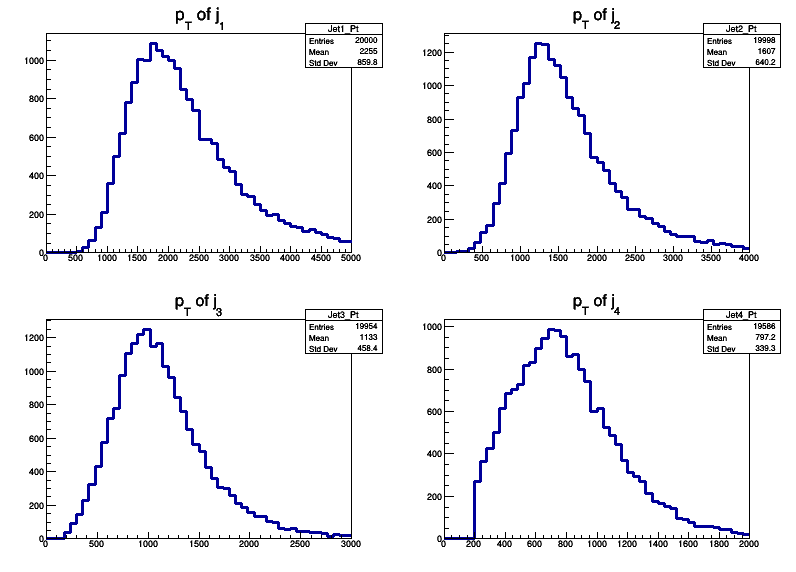

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpMliWNQ.png has been created


In [10]:
c2=rootnotes.canvas()
c2.Divide(2,2)
for i in range(4):
    c2.cd(i+1)
    hJet_Pt[i].Draw()
c2

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


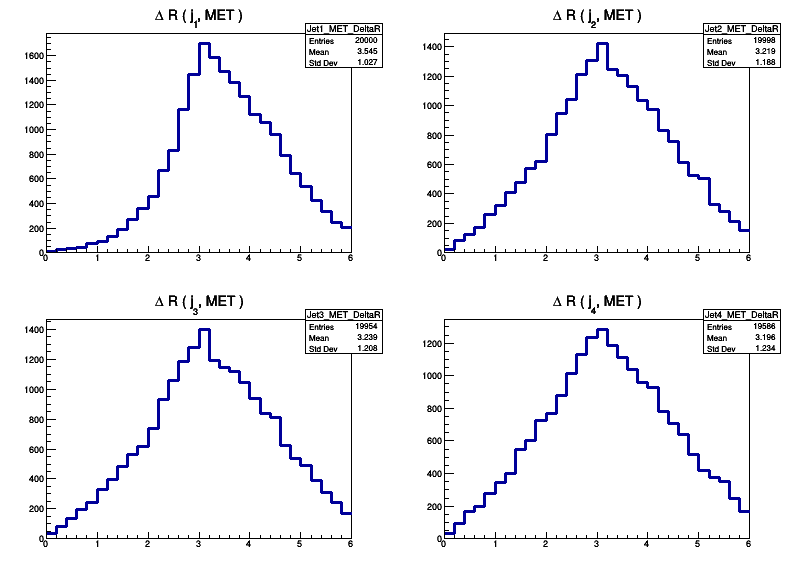

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpM2tUOJ.png has been created


In [11]:
c3=rootnotes.canvas()
c3.Divide(2,2)
for i in range(4):
    c3.cd(i+1)
    hJet_MET_DeltaR[i].Draw()
c3